# Exercise Sheet 2

## Exercise T2.1

### a)What does a connectionist neuron compute?

A connectionist neuron is a type of neuron model which measrues for a featue within an observation. It is a feature detector/extractor. (see Tutorial Notes 02, p. 1). A connectionist neuron musst extract some feature from the input it receives. I.e. a bias node is no connectionist neuron, as it receives no input.

### b) Which effect do the weight and the bias have?

A connectionist neuron is composed of 5 elements (weihgt (w), linear filter, bias (\theta), transfer function (f()) and scalar output (y)). 
 

*   The weight show the strength of the connections between the neurons (white dots in graph) from the inputs it receives (arrows going into it). More mathematically, it represents the orientation of the hyperplane.
*   The bias is also called the threshold of a neuron. More mathematically: the threshold shifts the hyperplane.

### c) Why is a nonlinear transfer function beneficial compared to a linear one?

The non-linear transfer function has three advantages in comparion to a linear on:

1.   one can do binary classifications
2.   One can interpret the transfer function as a probability: One way to do this is to use a logistic sigmoidal transfer function.
3. Not necessarily an advantage, but rather why linear functions make no sens in such a network: If one uses a linear transfer function, one can actually get rid of all the layers. The become redundant, and one can reduce the network to a single layer network. With non-linear, this is not possible. A network needs its hidden layers.

### d) What is a feedforward mulitlayer perceptron (MLP)?

Think about the graphs we have seen in class: in a feedforward neural network, there are only arrows pointing to the right, and none to the left. I.e there are no connections that feed back to the neurons in an earlier layer. Thereby an MLP consist of an input layer, several hidden layers and an output layer. (see for more on p.2 of Notes 3)

## Exercise H2.1 \
**a)** Plot the data in a scatter plot (x2 vs. x1). Mark the points with different colors to indicate
the type of each object.

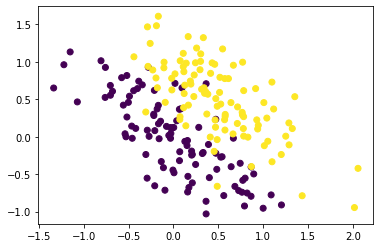

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines
import seaborn as sns

data= pd.read_csv(r"applesOranges.csv", sep=",", header=0, names=('x.1', 'x.2', 'y'))
data.head()
plt.scatter(data['x.1'],data['x.2'], c=data['y'])

**b)** Set the bias  = 0. Create a set of 19 weight vectors w pointing from the
origin to the upper semi-circle with radius 1 \\


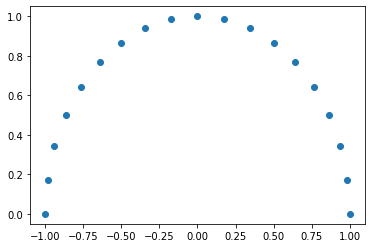

In [ ]:
n=data.shape[0]
features=np.array((data['x.1'],data['x.2']))
#create weights w
gammas=np.linspace(0,np.pi,19)
x=np.cos(gammas)
y=np.sin(gammas)
w=np.array((x,y))
plt.scatter(w[0,:],w[1,:])

**(i)** determine % correct classifications rho of the corresponding neuron

In [ ]:
#(i)
rho=np.empty(shape=(19,1))
for idx in range(19):
    #classification: calculate scalar product and check if positive or negative
    f=np.sign(np.dot(w[:,idx],features))
    #transform to 0-1 scale
    f[f<0]=0
    #count how often it is specified correctly
    rho[idx]=sum(f==data['y'])
    rho[idx]=rho[idx]/n  

**(ii)** plot a curve showing rho as a function of gamma
.

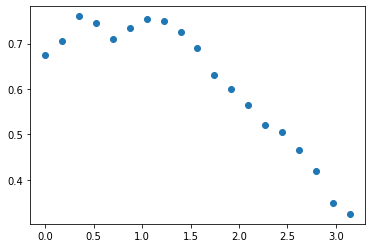

In [ ]:
plt.scatter(gammas,rho)

**c)** Out of the 19 weight vectors from above, pick the w that yields the best performance. Now, vary the bias theta

In [ ]:
w_star=w[:,np.argmax(rho)]
print(w_star)
#find best theta
dot=np.dot(w_star,features)
#create empty array to append (first element has to be deleted later)
p=np.empty(shape=(1,1))
thetas=np.arange(-3,3, 0.1)
for theta in thetas:
    c=np.sign(dot-theta) # compute y(x)
    c[c<0]=0
    p=np.append(p,sum(c==data['y'])/n)
#delete first element    
p=np.delete(p,0)
theta_star=thetas[np.argmax(p)]
print(theta_star)

[0.93969262 0.34202014]
0.20000000000000284


**d)** Plot the data points and color them according to the predicted classification

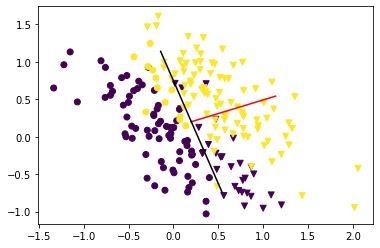

In [ ]:
f_star=np.sign(np.dot(w_star,features)-theta_star) # using the best values
f_star[f_star<0]=0 # implementing "otherwise in f star"

#DOES NOT WOKR: marker determines the shape of the data point when plotting
#markers=["o" if a else "v" for a in (f_star==0)]
#plt.scatter(data['x.1'], data['x.2'], c=data['y'], marker=markers)

#seperate data according to classification
x1_0=data['x.1'][f_star==0]
x1_1=data['x.1'][f_star==1]
x2_0=data['x.2'][f_star==0]
x2_1=data['x.2'][f_star==1]
y_0=data['y'][f_star==0]
y_1=data['y'][f_star==1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1_0, x2_0, c=y_0, marker='o')
ax.scatter(x1_1, x2_1, c=y_1, marker='v')
#add w_star
line1 = mlines.Line2D([theta_star,w_star[0]+theta_star],[theta_star,w_star[1]+theta_star], color='red')
ax.add_line(line1)
#add decision boundary
line2 = mlines.Line2D([theta_star,-w_star[1]+theta_star],[theta_star,w_star[0]+theta_star], color='black')
ax.add_line(line2)
line3 = mlines.Line2D([theta_star,w_star[1]+theta_star],[theta_star,-w_star[0]+theta_star], color='black')
ax.add_line(line3)
plt.show()

Interpretation: w (red vector) is perpendicular to decision boundary

**e)** Heat map over all combinations: Axis could be done better

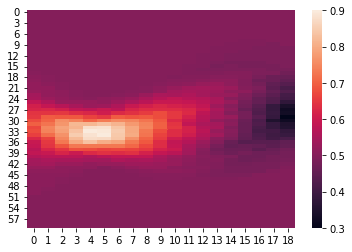

In [ ]:
heat=np.empty(shape=(len(thetas),19))
for i in range(19):
  j=0
  for theta in thetas:
    f_new=np.sign(np.dot(w[:,i],features)-theta)
    f_new[f_new<0]=0
    #count how often it is specified correctly
    heat[j,i]=sum(f_new==data['y'])
    heat[j,i]=heat[j,i]/n
    j=j+1
sns.heatmap(heat)

## Exercise H2.2

(a) Create 50 independent MLPs with N = 10 hidden units by sampling for each MLP a set of random parameters {w, b}, i = 1, ..., 10.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class MLP():
    def __init__(self, layer_sd=2.0, output_sd=1.0):
        self.bias = np.random.uniform(-2.0, 2.0, 10)
        self.layer_weights = np.random.normal(0.0, layer_sd, 10)
        self.output_weights = np.random.normal(0.0, output_sd, 10)

    def response(self, x):
        layer_value = np.multiply.outer(self.layer_weights, x) - np.vstack(self.bias)
        activation = np.tanh(layer_value)
        return activation.T.dot(self.output_weights)
        

# create mlps
mlps_high_sd = [MLP(layer_sd=2.0) for _ in range(50)]


(b) Plot the input-output functions (i.e. the response y(x)) of these 50 MLPs for x ∈ [−2, 2].

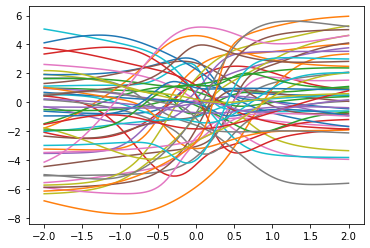

In [ ]:
# plot input-output functions
x = np.linspace(-2.0, 2.0, 100)
for mlp in mlps_high_sd:
  plt.plot(x, mlp.response(x))

(c) Repeat this procedure using a different intialization scheme for the weights of the hidden neurons:
w10 ∼ N (0, 0.5). What difference can you observe?

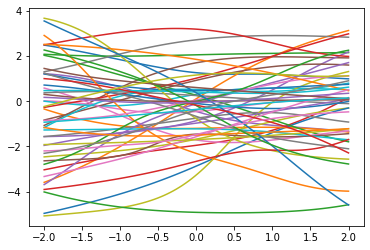

In [ ]:
# create mlps
mlps_low_sd = [MLP(layer_sd=0.5) for _ in range(50)]
for mlp in mlps_low_sd:
  plt.plot(x, mlp.response(x))


(d) Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the above two initialization procedures) input-output functions and the function g(x) = −x. For each of the two initialization procedures, which MLP approximates g best? Plot y(x) for these two MLPs

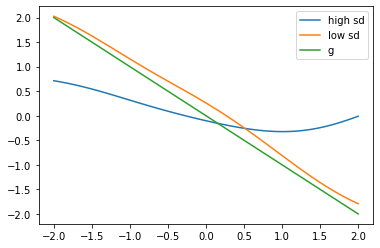

In [ ]:
def mse(target, estimate):
  return np.mean(np.square(target - estimate))

g = -x
mse_high_sd = [mse(g, mlp.response(x)) for mlp in mlps_high_sd]
mse_low_sd = [mse(g, mlp.response(x)) for mlp in mlps_low_sd]

best_high_sd = mlps_low_sd[np.argmin(mse_high_sd)]
best_low_sd = mlps_low_sd[np.argmin(mse_low_sd)]

plt.plot(x, best_high_sd.response(x), label="high sd")
plt.plot(x, best_low_sd.response(x), label="low sd")
plt.plot(x, g, label="g")
plt.legend()

